In [30]:
import pandas as pd

df=pd.read_csv('d:/data/titanic/train3.csv')
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [31]:
df.describe()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


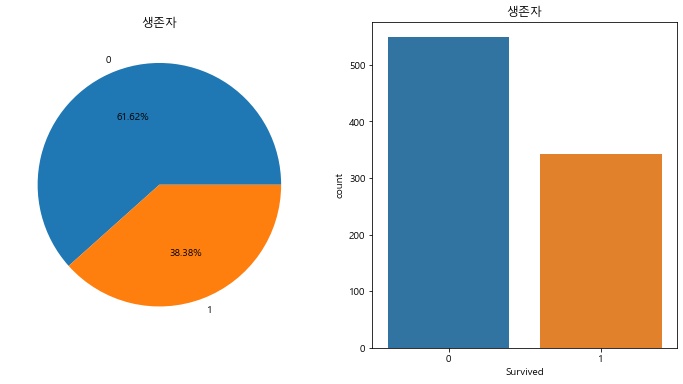

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font', family=font_name)

f, ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df, ax=ax[1])
ax[1].set_title('생존자')
plt.show()

<AxesSubplot:>

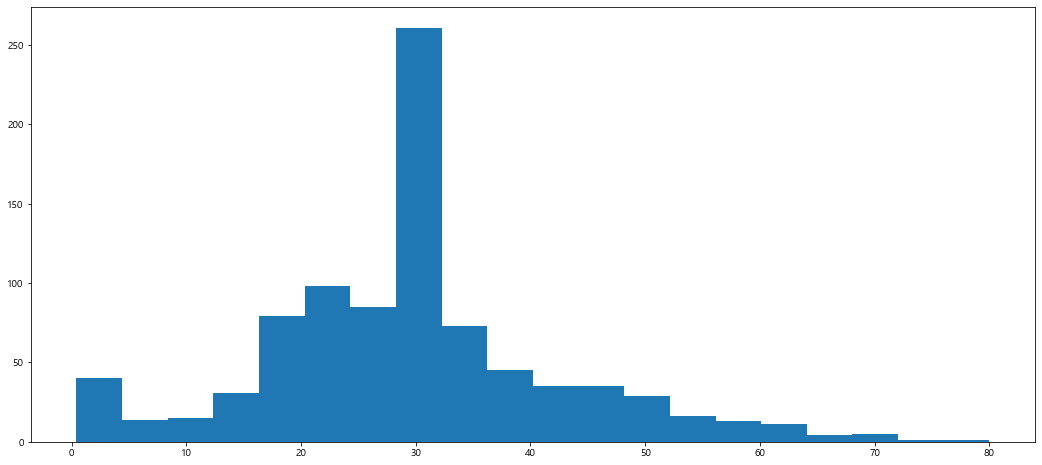

In [33]:
# 승객들의 연령 분포
df['Age'].hist(bins=20, figsize=(18,8), grid=False)

In [34]:
df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [35]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [36]:
df.groupby('Pclass3').mean()

,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


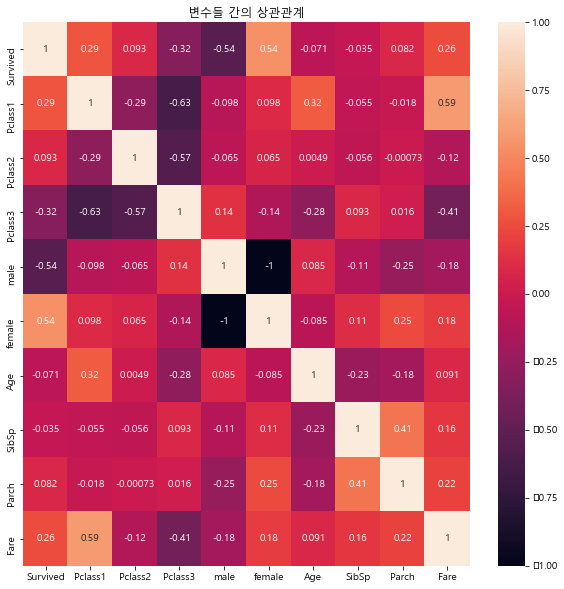

In [37]:
# 상관관계 분석
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

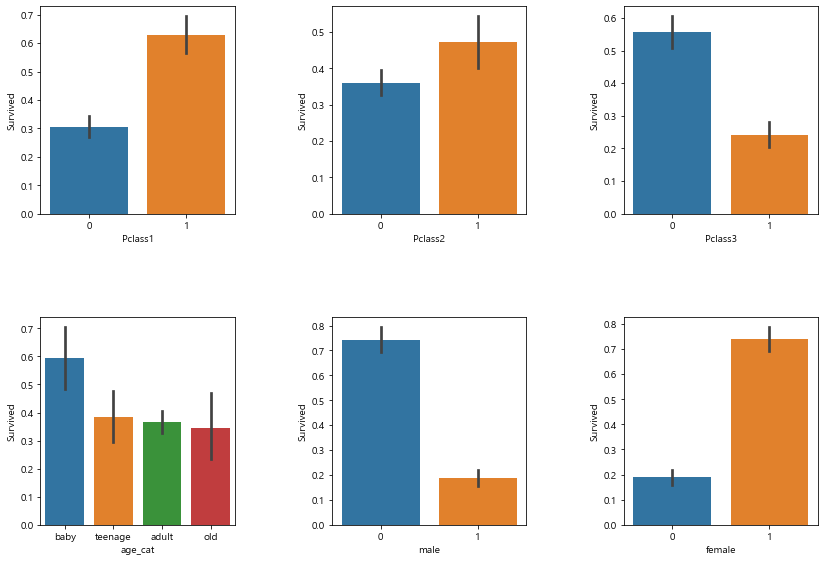

In [38]:
# 연령대를 나눠서 분석
df['age_cat']=pd.cut(df['Age'], bins=[0,10,20,50,100], include_lowest=True,
labels=['baby', 'teenage','adult','old'])
plt.figure(figsize=[12,8])
plt.subplot(231)
sns.barplot(x='Pclass1', y='Survived', data=df)
plt.subplot(232)
sns.barplot(x='Pclass2', y='Survived', data=df)
plt.subplot(233)
sns.barplot(x='Pclass3', y='Survived', data=df)
plt.subplot(234)
sns.barplot(x='age_cat', y='Survived', data=df)
plt.subplot(235)
sns.barplot(x='male', y='Survived', data=df)
plt.subplot(236)
sns.barplot(x='female', y='Survived', data=df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()
# 1등석, 2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음
# baby와 female의 생존률이 높음

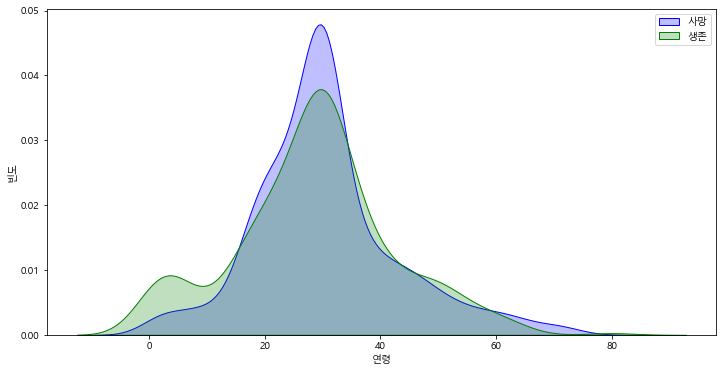

In [39]:
# 나이 분포 곡선(어린이들의 생존률이 상대적으로 높음)
f, ax=plt.subplots(figsize=(12,6))
# 커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선
g= sns.kdeplot(df['Age'][(df['Survived'] == 0)], ax=ax, color='blue', shade=True)
g= sns.kdeplot(df['Age'][(df['Survived'] == 1)], ax=g, color='green', shade=True)
g.set_xlabel('연령')
g.set_ylabel('빈도')
g=g.legend(['사망','생존'])

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


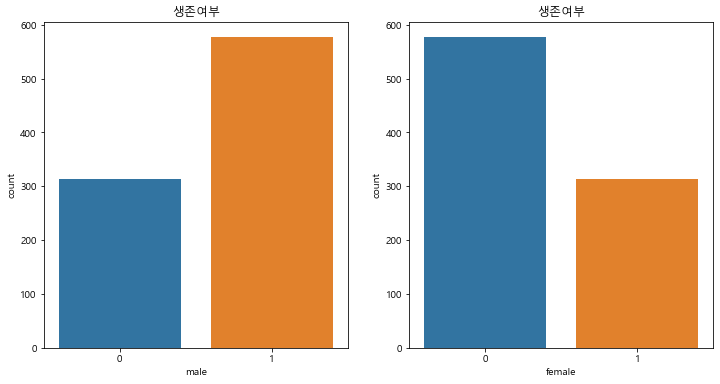

In [40]:
f, ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('male', data=df, ax=ax[0])
ax[0].set_title('생존여부')
sns.countplot('female', data=df, ax=ax[1])
ax[1].set_title('생존여부')
plt.show()

In [41]:
train_cols=df.columns[1:-1]
X=df[train_cols]
y=df['Survived']

In [42]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Survived'])
df_samp=pd.concat([X_samp, y_samp], axis=1)

In [43]:
X=X_samp[train_cols]
y=y_samp['Survived']

In [44]:
from sklearn.model_selection import train_test_split
# 데이터셋 구분
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=7) 

In [45]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense

model=Sequential() # 모델 구성
# 노드 개수, 독립변수 개수, 활성화함수 relu
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# sigmoid : 0.0 ~ 1.0
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

<AxesSubplot:>

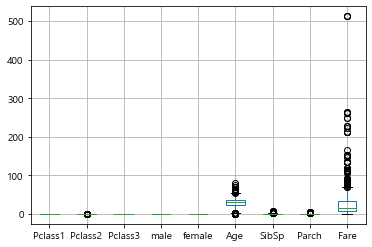

In [46]:
X_train.boxplot()

['d:/data/titanic/scaler.model']

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


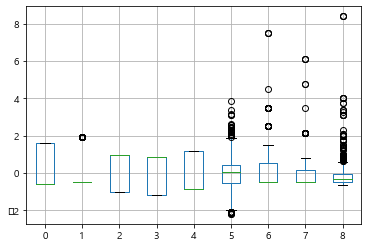

In [47]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
# 넘파이 배열로 바뀜
# 넘파이 배열 → 데이터프레임
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

dump(scaler, 'd:/data/titanic/scaler.model', compress=True)

In [48]:
# 모델 학습
hist=model.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 4ms/step - loss: 0.2164 - accuracy: 0.7075
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1672 - accuracy: 0.7824
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1488 - accuracy: 0.8007
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1404 - accuracy: 0.7916
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1377 - accuracy: 0.8117
Epoch 6/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1356 - accuracy: 0.8007
Epoch 7/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1352 - accuracy: 0.8117
Epoch 8/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1332 - accuracy: 0.8135
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1342 - accuracy: 0.8117
Epoch 10/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1308 - accuracy: 0.8318
Epoch 11/

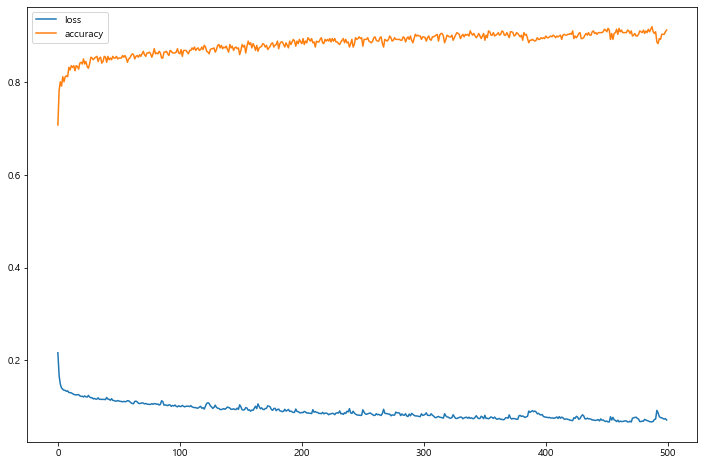

In [49]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [52]:
# 모델 평가
scores=model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100)) # 학습용
scores=model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100)) # 검증용

18/18 [==============================] - 0s 7ms/step - loss: 0.0654 - accuracy: 0.9122
[0.0653567761182785, 0.9122486114501953]
accuracy : 91.22%
5/5 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.7737
[0.18750855326652527, 0.7737226486206055]
accuracy : 77.37%


In [54]:
# 새로운 값 예측
# 1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

person1=[[0,0,1,1,0,19,2,0,50]] # 3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금 50
person2=[[1,0,0,0,1,17,0,2,30]] # 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금 30
person3=[[0,1,0,0,1,40,1,1,70]] # 2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금 70
# 스케일링을 해야 할 경우
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

[[0.00021173]]
[[0.9999403]]
[[0.9999975]]


In [56]:
model.save('d:/data/titanic')

INFO:tensorflow:Assets written to: d:/data/titanic\assets
